# Machine learning workflow demo

## Predicting house prices with California data

## Load libs

In [1]:
%run -i utils/calhousing.py
%matplotlib inline

/opt/miniconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/miniconda/lib/python2.7/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)
/opt/miniconda/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Loading BokehJS ...

## Inspect data in source format

In [2]:
!head data/cal_housing_small.data
!wc data/cal_housing_small.data

longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,medianHouseValue
-120.58,35.0,37.0,523.0,119.0,106300.0
-118.17,33.98,31.0,1236.0,329.0,155400.0
-122.22,37.81,52.0,1971.0,335.0,273700.0
-117.91,33.66,21.0,1708.0,505.0,193800.0
-121.92,37.24,27.0,1265.0,216.0,281200.0
-117.01,32.71,20.0,3506.0,692.0,129100.0
-116.39,34.15,15.0,5583.0,1149.0,73300.0
-120.67,35.5,15.0,2752.0,546.0,175000.0
-118.18,34.04,36.0,1807.0,630.0,129000.0
  501   501 20363 data/cal_housing_small.data


## Load data in Python's memory

In [3]:
d = pd.read_csv("data/cal_housing_small.data")
print d.shape
d.head()

(500, 6)


,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,medianHouseValue
0,-120.58,35.00,37.0,523.0,119.0,106300.0
1,-118.17,33.98,31.0,1236.0,329.0,155400.0
2,-122.22,37.81,52.0,1971.0,335.0,273700.0
3,-117.91,33.66,21.0,1708.0,505.0,193800.0
4,-121.92,37.24,27.0,1265.0,216.0,281200.0


## Show house locations on map

observa como el valor de las casas es más caro en zonas urbanas

In [4]:
ds = d.sample(500)
plot_map(ds["latitude"].values, 
         ds["longitude"].values, ds["medianHouseValue"].values.reshape(-1,1)/1e5) 

## Separate variable to predict

In [5]:
X = d.as_matrix()[:,:-1]
y = d["medianHouseValue"].as_matrix()
print X.shape, y.shape

(500, 5) (500,)


Split data from train and test

In [6]:
Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.3)
print Xtr.shape, ytr.shape
print Xts.shape, yts.shape

(350, 5) (350,)
(150, 5) (150,)


Create model with train data

In [7]:
from sklearn.svm import SVC
dt = DecisionTreeRegressor()
dt = SVC()
dt.fit(Xtr,ytr)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Measure performance

In [8]:
print "train score", rel_rmse(dt, Xtr, ytr)
print "test score ", rel_rmse(dt, Xts, yts)

train score 0.0
test score  2.327672405532405


## Plot geographical distribution of errors

- limit errors to <1

In [9]:
preds = dt.predict(Xts)
errs = np.abs(preds-yts)/yts
errs[errs>1] = 1
plot_map(Xts[:,1], Xts[:,0], errs.reshape(-1,1))

## Make a parameter search

In [10]:
parameters = { 'max_depth': [None]+range(1,10)}
estimator = DecisionTreeRegressor()
best3 = gridsearch_best3(X,y, estimator, parameters, n_iter=10, test_size=0.3)
for i in best3:
    print i

mean: 0.42707, std: 0.05063, params: {'max_depth': 9}
mean: 0.43258, std: 0.05000, params: {'max_depth': 7}
mean: 0.43398, std: 0.03869, params: {'max_depth': 6}


## Use learning curves to assess performance

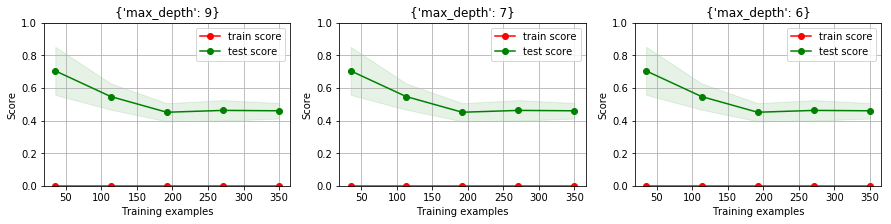

In [11]:
plot_best3(DecisionTreeRegressor(), X,y, best3, ylim=(0,1))

## We obtained models with LOTS of variance!!! $\rightarrow$ increase data

In [12]:
d = pd.read_csv("data/cal_housing.data").sample(1000)
X = d.as_matrix()[:,:-1]
y = d["medianHouseValue"].as_matrix()
print X.shape, y.shape
d.head()

(1000, 5) (1000,)


,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,medianHouseValue
3913,-118.55,34.20,31.0,1963.0,420.0,211800.0
13976,-116.98,34.13,16.0,2098.0,449.0,133900.0
8363,-118.35,33.97,33.0,1495.0,474.0,143500.0
19072,-122.49,38.32,30.0,1631.0,284.0,195500.0
1103,-121.51,39.97,22.0,1468.0,285.0,73000.0


mean: 0.36637, std: 0.01173, params: {'max_depth': 9}
mean: 0.36682, std: 0.01340, params: {'max_depth': 8}
mean: 0.36954, std: 0.01929, params: {'max_depth': 7}


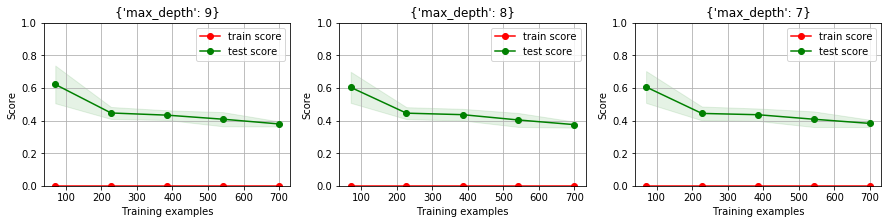

In [13]:
parameters = { 'max_depth': [None]+range(1,10)}
estimator = DecisionTreeRegressor()
best3 = gridsearch_best3(X,y, estimator, parameters)
for i in best3:
    print i
plot_best3(DecisionTreeRegressor(), X,y, best3, ylim=(0,1))

## increase data until 20k (all available)

(10000, 5) (10000,)
mean: 0.26441, std: 0.00558, params: {'max_depth': None}
mean: 0.27745, std: 0.00674, params: {'max_depth': 9}
mean: 0.28970, std: 0.00653, params: {'max_depth': 8}


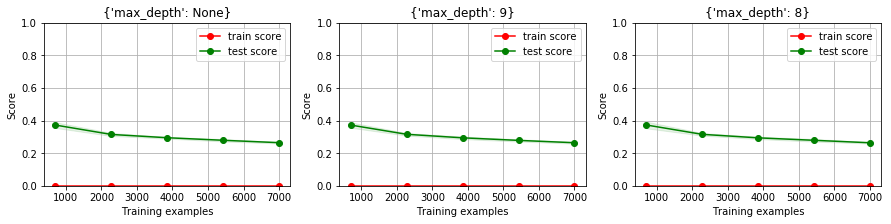

In [14]:
d = pd.read_csv("data/cal_housing.data").sample(10000)
X = d.as_matrix()[:,:-1]
y = d["medianHouseValue"].as_matrix()
print X.shape, y.shape
parameters = { 'max_depth': [None]+range(1,10)}
estimator = DecisionTreeRegressor()
best3 = gridsearch_best3(X,y, estimator, parameters)
for i in best3:
    print i
plot_best3(DecisionTreeRegressor(), X,y, best3, ylim=(0,1))

## no more data available. let's try to add more information

In [15]:
d = pd.read_csv("data/cal_housing_full.data")
d.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


(20640, 8) (20640,)
mean: 0.22612, std: 0.00438, params: {'max_depth': 10}
mean: 0.23432, std: 0.00363, params: {'max_depth': 20}
mean: 0.23657, std: 0.00344, params: {'max_depth': None}


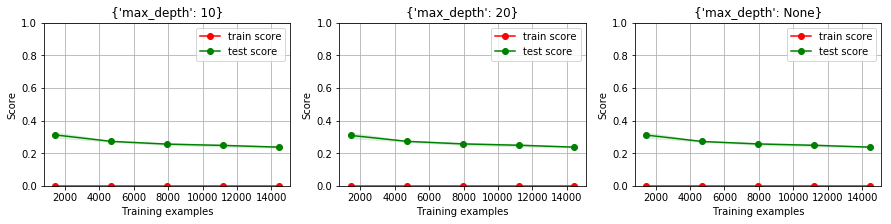

In [16]:
X = d.as_matrix()[:,:-1]
y = d["medianHouseValue"].as_matrix()
print X.shape, y.shape
best3 = gridsearch_best3(X,y, DecisionTreeRegressor(), { 'max_depth': [None,1,5,10,20]})
for i in best3:
    print i
plot_best3(DecisionTreeRegressor(), X,y, best3,  ylim=(0,1))

## Let's observe geographical error distribution

In [17]:
d = pd.read_csv("data/cal_housing_full.data")
Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.5)
dt = DecisionTreeRegressor(max_depth=10)
dt.fit(Xtr,ytr)
print "train score", rel_rmse(dt, Xtr, ytr)
print "test score ", rel_rmse(dt, Xts, yts)
preds = dt.predict(Xts)
errs = np.abs(preds-yts)/yts
errs[errs>1]=1
plot_map(Xts[:3000,1], Xts[:3000,0], errs.reshape(-1,1))

train score 0.1649694761172701
test score  0.23289836190792715


## We now use this model to predict the price of a new house

In [18]:
newh = [[-118.22, 37.4, 10, 5000, 550, 8000, 200000, 3.5]]
dt.predict(newh)

array([104052.98013245])

## Understand our model's response to each variable

In [19]:
d = pd.read_csv("data/cal_housing_full.data").sample(20000)

nsamples = 1000
ncols = len(d.columns)-1
sample = np.random.random(size=(nsamples, ncols))
sample = (sample*20.).astype(int)/20.
dsample = pd.DataFrame(sample, columns=d.columns[:-1])
for i in d.columns[:-1]:
    dsample[i] = MinMaxScaler(feature_range=(np.min(d[i]), np.max(d[i]))).fit_transform(dsample[i].values.reshape(-1,1))

plot_map(dsample["latitude"], dsample["longitude"], dt.predict(sample).reshape(-1,1)/1e5, size=5)

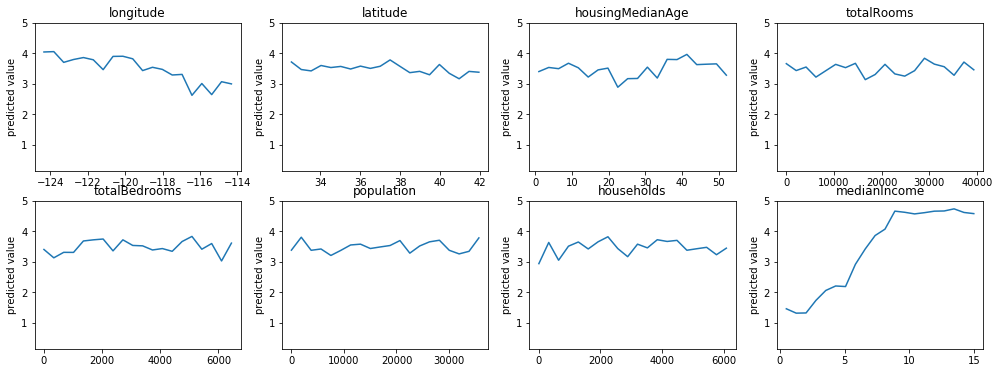

In [20]:
fig = plt.figure(figsize=(17,6))
c = 1
for col in dsample.columns:
    fig.add_subplot(2,4,c)
    c+=1
    x,y = [], []
    for i in np.unique(dsample[col]):
        x.append(i)

        dx = dsample[dsample[col]==i]
        y.append(np.mean(dt.predict(dx)/1e5))
    plt.plot(x,y)
    plt.ylabel("predicted value")
    plt.ylim(np.min(d["medianHouseValue"])/1e5, np.max(d["medianHouseValue"])/1e5)
    plt.title(col)
    

## Try using only visually meaningful columns

In [21]:
dfull = pd.read_csv("data/cal_housing_full.data")
d = dfull[["longitude", "latitude", "medianIncome", "medianHouseValue"]]
d.shape


(20640, 4)

(20640, 3) (20640,)
mean: 0.21030, std: 0.00405, params: {'max_depth': 10}
mean: 0.21378, std: 0.00537, params: {'max_depth': 20}
mean: 0.21692, std: 0.00461, params: {'max_depth': None}


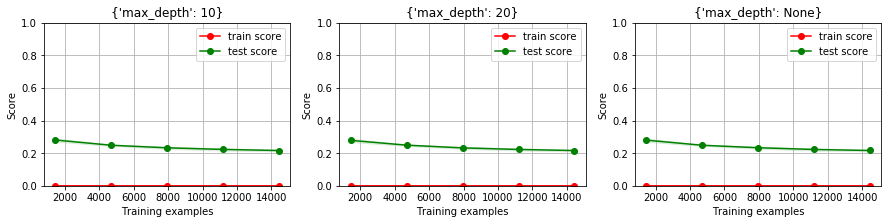

In [22]:
X = d.as_matrix()[:,:-1]
y = d["medianHouseValue"].as_matrix()
print X.shape, y.shape
best3 = gridsearch_best3(X,y, DecisionTreeRegressor(), { 'max_depth': [None,1,5,10,20]})
for i in best3:
    print i
plot_best3(DecisionTreeRegressor(), X,y, best3,  ylim=(0,1))

In [23]:
for i,col in enumerate(dfull.columns):
    if col!="medianHouseValue":
        print "%20s %.3f"%(col, dt.feature_importances_[i])

           longitude 0.174
            latitude 0.143
    housingMedianAge 0.054
          totalRooms 0.010
       totalBedrooms 0.022
          population 0.012
          households 0.009
        medianIncome 0.576
